In [233]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import decimal
%matplotlib inline

# Stability and reliability of community biomass given an assortment of species that vary differently through time.

## Goal: pretend we know something (mean, variance) about how the biomasses of different species should change through time. Can we extend these species-specific predictions to assess reliability of the system through time?

### First: simulate species responses through time.

### Each species' expected biomass curve will be defined by a sine wave that we'll shift around (left right, up down) and scale (height, width). We are defining species' variances as linear functions of biomass.

In reality, each species' analytical expectations through time might be derived from an observed environmental variable(s) (eg, temperature, competition) through time, and knowledge of each species' response to different values of this variable.

In [157]:
timelength = 100 # length of our time series... eg years?
lins=np.linspace(0,timelength,timelength*10) # make the x values on which we'll calculate y values
comm_dict = {} # store the species time series drawn from normal, defined by analytic expectations and variances
exp_dict = {} # store analytic expectations for each species
var_dict = {} # store analytic variances for each species
num_species = 100 # number of species in our community
for i in range(num_species):
    sideshift = np.random.uniform(np.pi,3*np.pi) # shift the sine wave left and right
    upshift = np.random.uniform(np.pi,3*np.pi) # shift the sine wave up
    scale = np.random.uniform(np.pi,3*np.pi) # scale the wave vertically (after vertical shift...)
    spread = np.random.uniform(-np.pi,np.pi) # scale the wave horizontally
    exp1 = scale*(np.sin(spread*(lins)-sideshift)+upshift) # 
    var1 = .1*exp1
    timeseries = np.random.normal(exp1,np.sqrt(var1))
    
    # save values 
    exp_dict[i] = exp1
    var_dict[i] = var1
    comm_dict[i] = timeseries

## let's see individual species time series expectations, variances, and path samples.

### Species 1:

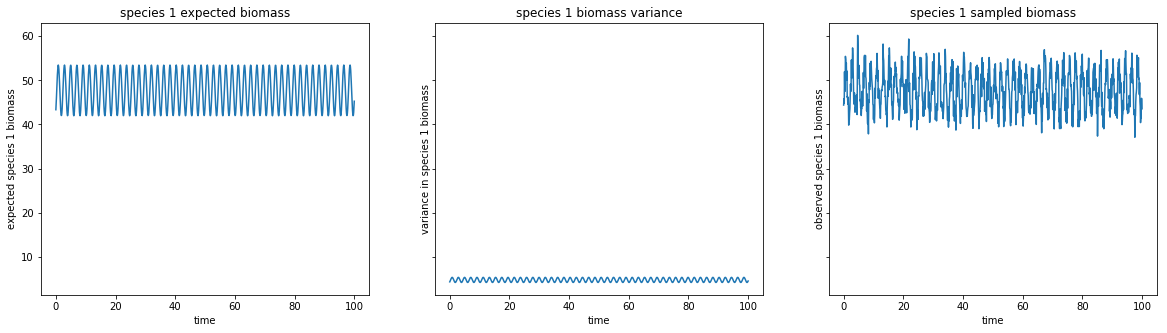

In [280]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5));
ax1.set_title("species 1 expected biomass")
ax1.set_ylabel('expected species 1 biomass');
ax1.set_xlabel('time');

ax2.set_title("species 1 biomass variance")
ax2.set_ylabel('variance in species 1 biomass');
ax2.set_xlabel('time');

ax3.set_title("species 1 sampled biomass")
ax3.set_ylabel('observed species 1 biomass');
ax3.set_xlabel('time');

sns.lineplot(x=lins, y=exp_dict[0], ax=ax1);
sns.lineplot(x=lins, y=var_dict[0], ax=ax2);
sns.lineplot(x=lins, y=comm_dict[0], ax=ax3);

### Species 2:

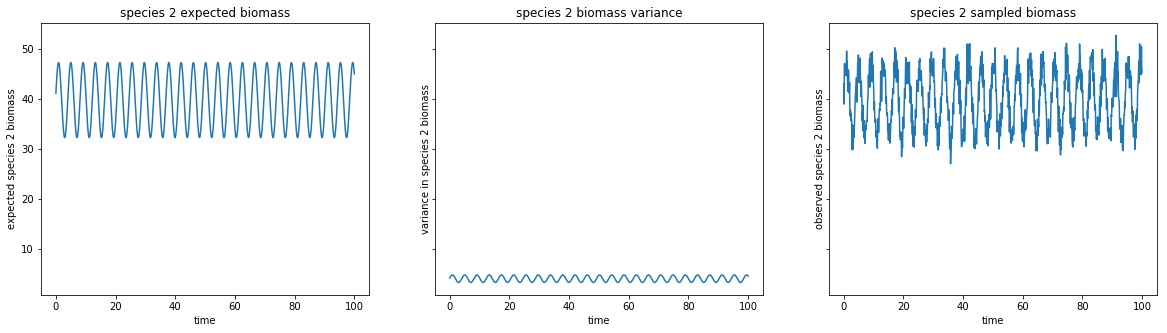

In [281]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5));
ax1.set_title("species 2 expected biomass")
ax1.set_ylabel('expected species 2 biomass');
ax1.set_xlabel('time');

ax2.set_title("species 2 biomass variance")
ax2.set_ylabel('variance in species 2 biomass');
ax2.set_xlabel('time');

ax3.set_title("species 2 sampled biomass")
ax3.set_ylabel('observed species 2 biomass');
ax3.set_xlabel('time');

sns.lineplot(x=lins, y=exp_dict[1], ax=ax1);
sns.lineplot(x=lins, y=var_dict[1], ax=ax2);
sns.lineplot(x=lins, y=comm_dict[1], ax=ax3);

### Species 3:

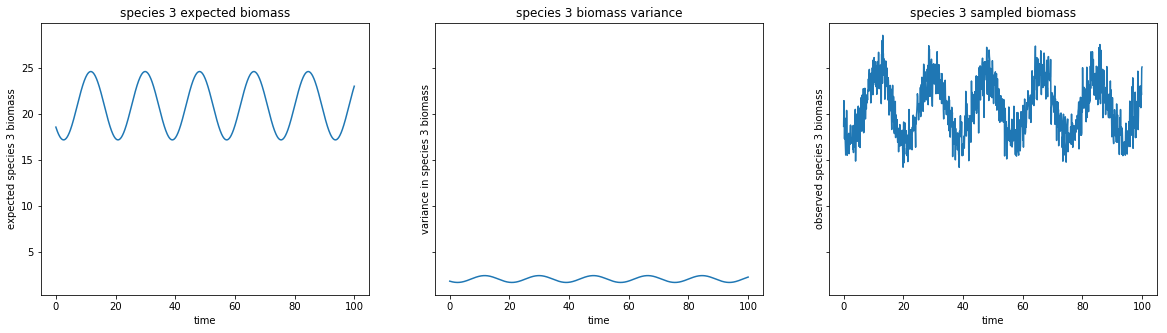

In [282]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5));
ax1.set_title("species 3 expected biomass")
ax1.set_ylabel('expected species 3 biomass');
ax1.set_xlabel('time');

ax2.set_title("species 3 biomass variance")
ax2.set_ylabel('variance in species 3 biomass');
ax2.set_xlabel('time');

ax3.set_title("species 3 sampled biomass")
ax3.set_ylabel('observed species 3 biomass');
ax3.set_xlabel('time');

sns.lineplot(x=lins, y=exp_dict[2], ax=ax1);
sns.lineplot(x=lins, y=var_dict[2], ax=ax2);
sns.lineplot(x=lins, y=comm_dict[2], ax=ax3);

### ...and so on. We have 100 species.

## What about when we add up all of the species vals?

(question: can we just add up the species variances here? I think there's a nuance to this that I'm overlooking but haven't looked it up. But I do think we can get community level variance from species variances, so pretend for now)

In [178]:
comm_exp = np.sum(np.array([exp_dict[i] for i in range(num_species)]),axis=0)
comm_var = np.sum(np.array([var_dict[i] for i in range(num_species)]),axis=0)
comm_mass = np.sum(np.array([comm_dict[i] for i in range(num_species)]),axis=0)

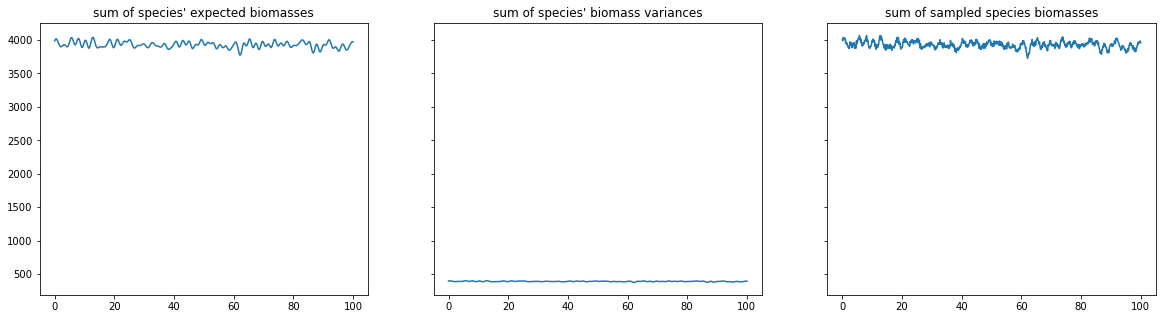

In [186]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20,5));
ax1.set_title("sum of species' expected biomasses")
ax2.set_title("sum of species' biomass variances")
ax3.set_title("sum of sampled species biomasses")
sns.lineplot(x=lins, y=comm_exp, ax=ax1);
sns.lineplot(x=lins, y=comm_var, ax=ax2);
sns.lineplot(x=lins, y=comm_mass, ax=ax3);

## So here we see the portfolio effect in action! Nice. 

##  

# Reliability:

## "When does the community function (biomass) break?" My interpretation of this is "how long until community function crosses some threshold?"

### Maybe for some reason we think the system "breaks" when we observe a community biomass value below 3750.

### So first we need a probability for each time point that we observe something below 3750. We can do this because we have a biomass expectation and variance for each time point.

This is 1-prob(biomass < 3750) =  
1-P(Z < (3750-mean)/sqrt(variance))

In [285]:
# mean at first time point
print('expected biomass at first time point is: ' + str(comm_exp[0]))
# sqrt(variance) at first time point
print('standard deviation at first time point is: ' + str(np.sqrt(comm_var[0])))

expected biomass at first time point is: 3983.197661705319
standard deviation at first time point is: 19.957949949093766


In [287]:
# what's the probability of observing 3750 given the mean and variance at this point?
print('probability of observing "biomass<3750" at first time point is: ' + str(st.norm.cdf((3750 - comm_exp[0]) / np.sqrt(comm_var[0]))))

probability of observing "biomass<3750" at first time point is: 7.653388151384645e-32


### so the probability of crossing the threshold at this time point is very small. But these probabilities will change at different time points, and we're just looking for the first time that we observe something.

So let's calculate the probability of not observing any event at each time point, giving us a reliability curve.

In [240]:
# get the probability of reaching the threshold at each time point
probs = np.array([st.norm.cdf((3750 - comm_exp[i]) / np.sqrt(comm_var[i])) for i in range(len(comm_exp))])
# get the log of the 1-probs for each time point
log_noevent_probs = np.array([(Decimal(1)-Decimal(i)).ln() for i in probs])

In [249]:
counter = Decimal(0)
reliability_probs = np.zeros(log_noevent_probs.shape)
for i in range(len(reliability_probs)):
    counter += log_noevent_probs[i]
    reliability_probs[i] = counter.exp()

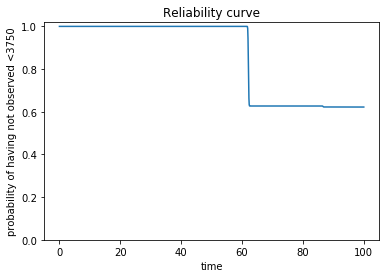

In [284]:
ax = sns.lineplot(lins,reliability_probs);
ax.set_title('Reliability curve')
ax.set_ylabel('probability of having not observed <3750');
ax.set_xlabel('time');
ax.set_ylim(0,);

So about 40% of observations would have crossed the threshold during the time series.

## Wild! This big drop in reliability corresponds with a drop in the community-level expectation from the graph we already plotted near the beginning (y axis rescaled here to emphasize the drop in expectation):

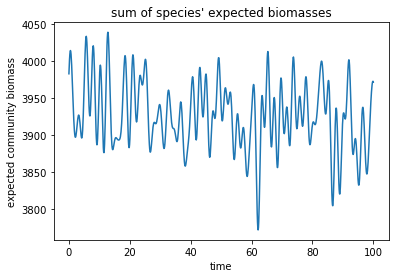

In [279]:
ax = sns.lineplot(x=lins, y=comm_exp);
ax.set_title("sum of species' expected biomasses");
ax.set_ylabel('expected community biomass');
ax.set_xlabel('time');

# Conclusions:

### This is a theoretical approach to inferring community-level reliability curves from knowledge of the individual species' expected mean values and variances under changing environmental conditions.

We started with 100 time series of expected species-specific functional values (let's assume biomass) through time, and the variances associated with these values at each time point. These expectations and variations might have been derived from 1) known species biomass responses to change in the variable (temperature), and 2) a time series of temperature data. For simplicity, we just set up a random sine-wave process so that different species were varying pretty differently from one another, and in a way that changed through time.

We looked at the expected biomass values for individual species through time, observing that they were individually quite variable through time. We then summed up all of the **expected biomass** values to see that the community biomass is **expected to stay pretty stable through time**. We summed the **variances** together at each time point as well. The **stability** we observe is the result of the **portfolio effect**!

We then consider the concept of **reliability**. We're interested in knowing **how long** we will wait until the system "breaks." In this example, we took "breaking" to mean crossing some minimum threshold of total community biomass.

We set a community biomass "breaking" threshold of 3750 (this is arbitrary on my part, but would ideally have some biological meaning), and then asked how long we would have to wait until crossing that threshold for the first time, still just given our expected biomass values and variances.

The sharpness of the drop in reliability is probably due to the fact that we have so many species with such low individual variances through time, so that we don't "slowly" approach the possibility of crossing the threshold.

# Next steps:

We've only done this once with randomized species responses so far. But an intuitive extension would be to pick different numbers species, pick proportional biomass threshold values, and examine how the reliability curves change across many samples of these different numbers of species.

With fewer species, the drop in the reliability curve would probably occur more quickly.